# Sense HAT for PYNQ:Temperature and Pressure Sensor

This notebook illustrates how to read the temperature and pressure sensor data use the [Sense HAT](https://www.raspberrypi.org/products/sense-hat/) .


This example notebook does the following.
1. import python libraries
2. select rpi switch and using MicroblazeLibrary
3. configure the I2C device
4. read single temperature and pressure
5. read and plot temperature once every 200ms for 5s

<img src="data/PYNQ_with_Sense_HAT.jpg" width=45% height=45% alt="PYNQ with Sense HAT"  align=center />

### 1. Sense HAT Introduction

The Sense HAT, which is a fundamental part of the [Astro Pi](https://astro-pi.org/) mission, allows your board to sense the world around it.I thas an 8×8 RGB LED matrix, a five-button joystick and includes the following sensors:

* Gyroscope
* Accelerometer
* Magnetometer
* Temperature
* Barometric pressure
* Humidity

<img src="data/Sense_HAT.jpg" width=50% height=50% alt="Sense HAT add-on board"  align=center />


### 2. Prepare the overlay
Download the overlay first, then select the shared pin to be connected to
RPI header (by default, the pins will be connected to PMODA instead).

In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib import MicroblazeLibrary
import matplotlib.pyplot as plt
from imp import reload
from time import sleep
from sensehat import *

In [2]:
base = BaseOverlay('base.bit')
base.select_rpi()
lib = MicroblazeLibrary(base.RPI, ['i2c','xio_switch','circular_buffer'])

### 3. Configure the I2C device
Initialize the I2C device and set the I2C pin of RPI header 

In [3]:
i2c = lib.i2c_open_device(1)
lib.set_pin(2, lib.SDA1)
lib.set_pin(3, lib.SCL1)

### 4. Read single temperature and pressure
The MEMS pressure sensor of Sense HAT is LPS25H, 

In [4]:
lps25h_sensor = lps25h.LPS25H_I2C(i2c)
press = lps25h_sensor.pressure
print('Pressure (hPa): ({0:0.3f})'.format(press))
tmp = lps25h_sensor.temperature
print('Temperature (℃"): ({0:0.3f})'.format(tmp))

Pressure (hPa): (1016.559)
Temperature (℃"): (26.863)


### 5. Start logging once every 200ms for 5 seconds
Executing the next cell will start logging the temperature sensor values every 200ms, and will run for 5s. 

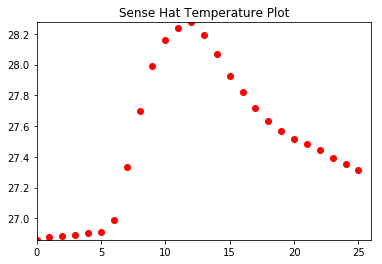

In [5]:
cnt = 0
tmp_array = []
while True:
    tmp = lps25h_sensor.temperature
    tmp_array.append(tmp)
    cnt = cnt + 1
    sleep(0.2)
    if cnt > 25:
        break
plt.plot(range(len(tmp_array)), tmp_array, 'ro')
plt.title("Sense Hat Temperature Plot")
min_tmp_array = min(tmp_array)
max_tmp_array = max(tmp_array)
plt.axis([0, len(tmp_array), min_tmp_array, max_tmp_array])
plt.show()

### 6.Clean up
Close the I2C device and switch back the connection on the shared pin to PMODA header.

In [6]:
i2c.close()
base.select_pmoda()